# Simple Linear Regression

- SLR merupakan jenis regresi yang terdiri dari satu variable independent (prediktor) yang akan memprediksi variable dependent (target)
- rumus SLR ...    **Y=βo+β1X+ϵ**
    - Y  = variable target
    - X  = variable prediktor
    - βo = konstanta, perpotongan garis regresi dengan sumbu Y (nilai estimasi jika x = 0)
    - β1 = koefisien regresi (slope)
    - ϵ  = kesalahan acak  

### Tahapan dalam melakukan teknik SLR secara manual

1. mencari apakah ada hubungan antara variable x dan y > *cukup melihat saja dataset yang ada*
2. menentukan variable x dan variable y > * variabel x adalah variable pengaruh dan variable y adalah variable yang dipengaruhi*
3. membuat scatter plot dari variabel x dan y 
4. analisis scatter plot, apakah ada hubungan liner ? jika ya maka model regresinya adalah SLR
5. menghitung a (intercept/koefisien model regresi) dan b (slope/ kemiringan gradien model) 
6. menghitung estimasi nilai y-hat = bo + bX, jika x dimasukan ke dalam persamaan regresi
7. membuat garis y-hat = bo + b1.X pada sumbu X dan Y

### Tahapan dalam melakukan teknik SLR menggunakan Python

#### 1. Import Library

library merupakan kumpulan fungsi-fungsi yang digunakan untuk melakukan tugas tertentu. Melalui penggunaan library, penulisan code menjadi efektif karena terhindar penulisan formula yang detail, berulang dan rapih. Untuk itu kita harus menggunakan library sesuai tugas dan kegunaannya melalui pemanggilan library terlebih dahulu.  

In [4]:
import pandas as pd # umum digunakan untuk mengubah data, membaca data dll
import numpy as np # melakukan operasi perhitungan numerik
from sklearn import linear_model # memanggil model regresi
from sklearn.linear_model import LinearRegression # memanggil regresi linear 
from sklearn.model_selection import train_test_split # memisahkan data train dan data test
import seaborn as sns # menampilkan visualisasi data
from sklearn import metrics # memanggil berbagai metrics evaluasi
import matplotlib.pyplot as plt # melakukan visualisasi data
%matplotlib inline 

#### 2. Membaca Data 

Setelah library dipanggil kedalam notebook, maka dataset yang ada di dalam komputer dipindahkan ke dalam notebook melalui import file yang selanjuntya disimpan ke dalam suatu variable atau objek.

In [5]:
df = pd.read_csv('dataset/nilai.csv') # memanggil data csv dan memasukan ke dalam variable df
df.head() # cek 5 nilai teratas

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Setelah data berhasil dibaca oleh notebook, maka tahap selanjutnya adalah data pre-processing. Tahapan ini bertujuan agar data yang digunakan dapat diterima oleh model. Ada serangkaian tahapan data pre-processing yang digunakan yaitu 
1. EDA
2. 


#### 3. Exploratory Data Analysis

EDA merupakan serangkaian teknik dan metode yang digunakan untuk menggali dan memahami karakteristik utama dari dataset sebelum menjalankan analisis lebih lanjut atau membangun model. Tujuan EDA adalah untuk mengidentifikasi pola, anomali, dan hubungan dalam data secara deskriptif. Berikut hal yang dilakukan dalam EDA, 

##### 3.1 Melihat dimensi dataset yang digunakan 

In [6]:
df.shape # melihat dimensi data 

(15, 2)

karena hanya ada dua variable maka dalam EDA yang paling sesuai adalah melakukan Bivariate Analysis

##### 3.2 Bivariate Analysis 

Bivariate analysis adalah Teknik analysis dan eksplorasi pada dua kolom dalam dataset. Umumnya menggunakan 1 kolom predictor dan 1 kolom target.

##### 3.2.1 Melihat distribusi data 

In [7]:
df.describe() # menampilkan distribusi data 

,Hours,Scores
count,15.000000,15.000000
mean,4.833333,48.066667
std,2.623429,25.327756
min,1.100000,17.000000
25%,2.950000,26.000000
50%,4.500000,42.000000
75%,6.800000,68.500000
max,9.200000,88.000000


##### 3.2.2 Melakukan visualisasi Data 

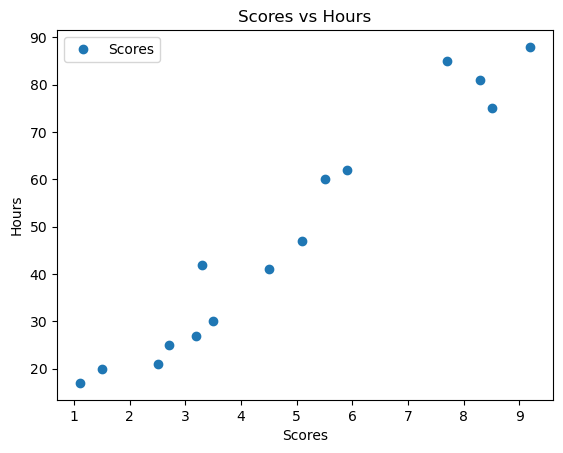

In [8]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Scores vs Hours')
plt.show()

**insight:**
- variable x dan variable y memiliki korelasi yang linear. Namun untuk lebih jelasnya gunakan garis gradien

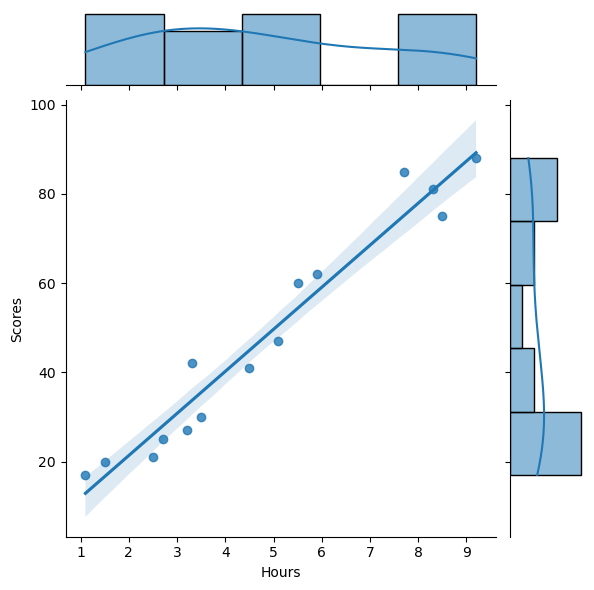

In [9]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

**insight:**
- dari gambar diatas menunjukan korelasi linear yang semakin jelas
- Hasil dari EDA diketahui bahwa dua variable saling berkorelasi linear sehingga memunkinkan untuk dilakukan pemodelan regresi linear 

#### 4. Menentukan Variable

Variable X dan variable Y ditentukan berdasarkan pengaruhnya. 

In [10]:
X = df.iloc[:,:-1].values  # variable predictor
y = df.iloc[:,1].values # variable target

- `.iloc`    : Metode pengindeksan yang digunakan untuk memilih baris dan kolom berdasarkan indeks numerik.
- `[:, :-1]` : Menggunakan slicing pada indeks kolom, ini mengambil semua baris (:) dan semua kolom kecuali yang terakhir (:-1). Dengan kata lain, ini mengambil semua fitur atau variabel independen kecuali variabel dependen yang terletak di kolom terakhir.
- `[:,1]`    : Mengambil semua baris pada kolom pertama saja 
- `.values`  : Digunakan saat berurusan dengan algoritma atau fungsi yang mengharapkan input dalam bentuk array NumPy.

In [11]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]]


In [12]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17]


#### 5. Splitting Data 

splitting data adalah proses memisahkan dataset menjadi dua yaitu data train dan data test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Scores'], test_size=0.2, random_state=0) # mengatur hyperparameter 
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (12, 1)
Test - Predictors shape (3, 1)
Train - Target shape (12, 1)
Test - Target shape (3, 1)


#### 6. Linear Regression using Scikit

In [14]:
regressor = LinearRegression() # algoritma regresi linear akan diwakili oleh variable regressor 
regressor.fit(x_train, y_train) # membuat model regresi linear berdasarkan dataset yang sudah disiapkan dan dipisahkan menjadi data training dan data testing

LinearRegression()

In [15]:
print(regressor.intercept_)

[2.32752006]


In [16]:
print(regressor.coef_)

[[9.56051622]]


**insight:**
- dari nilai koefisien dan intercept yang diperoleh diketahui bahwa
- menggunakan rumus y = ax + b,... maka y = 9.56051622X + 2.32752006
    - setiap X = 0 maka y = 2.32752006 artinya siswa yang tidak belajar sama sekali akan mendapatkan nilai sebesar 2.32752006
    - setiap siswa menambahkan 1 jam belajar maka nilainya akan bertambah sebanyak 9.56051622

#### 7. Melakukan Prediksi Data 

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

- `get_params()` : Metode ini memberikan informasi tentang parameter-parameter yang dapat dikonfigurasi pada suatu model machine learning, membantu pengguna untuk memahami konfigurasi model dan melakukan penyesuaian jika diperlukan.
- parameter seperti `fit_intercept`, `normalize`, dan lainnya yang dapat dikonfigurasi pada model regresi linear. Ketika kita memiliki pemahaman yang baik tentang parameter-parameter ini, kita dapat menggunakan metode .set_params() untuk mengubah nilai-nilai parameter atau menyesuaikan konfigurasi model sesuai kebutuhan spesifik.

In [19]:
df = pd.DataFrame({'Actual':y_test.ravel(), 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
0,47,51.086153
1,88,90.284269
2,81,81.679805


#### 8. Melakukan uji peforma model dengan metrics evaluasi

##### 8.1 Mean Absolute Error

In [20]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 2.3500755726078424


- MAE digunakan untuk menunjukan kesalahan rata-rata error nilai aktual(y_test) dan nilai prediksi (y_pred)
- MAE adalah total keseluruhan rata-rata selisih dari nilai prediksi dengan nilai sebenarnya yang diabsolutkan, untuk menghindari nilai minus yang menyebabkan adanya bias
- Semakin kecil nilai MAE maka semakin baik model regresi tersebut

##### 8.2 Mean Squared Error

In [21]:
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error 7.458888326959026


- MSE serupa dengan MAe, namun tidak diabsolutkan tetapi dikuadratkan
- MSE digunakan untuk mengetahui adanya nilai yang tidak terduga (bukan outlier) 
- Dengan MSE, nilai yang diperoleh bisa lebih besar dua kali lipat dari nilai MAE yang diperoleh
- Jika model regresi kita buruk maka metrics yang dihasilkan akan jauh lebih buruk karena dikuadratkan
- karena menggunakan mean, metrics ini rentan terhadap outliers sehingga sulit untuuk digunakan untuk menentukan peforma model

##### MAE vs MSE

Mana yang digunakan antara MAE atau MSE ?
- tergantung pada data yang dimiliki
- jika pada data terdapat outlier maka gunakan MAE
- jika terdapat data yang tidak terduga dan perlu perhatian khusus gunakan MSE 
- MAE lebih banyak digunakan diberbagai kasus dibandingkan MSE 

##### 8.3 Root Mean Squared Error

In [22]:
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 2.7310965429583454


- RMSE adalah nilai MSE yang di akar kuadratkan
- RMSE menjadikan nilai MSE yang berlipat ganda normal kembali

##### RMSE vs MSE

Mana yang digunakan antara MSE dan RMSE ?
- Jika kasus yang dihadapi terdapat outlier maka MAE lebih baik dari RMSE
- Jika membandingkan dua model regresi yang berbeda maka gunakan RMSE 


##### 8.4 R-Squared Value

In [23]:
print('Mean R^2  Squared Value', metrics.r2_score(y_test, y_pred))

Mean R^2  Squared Value 0.9767394334918118


- R-squared adalah nilai yang memiliki rentang 0-1 untuk menjelaskan besarnya variasi variable independen terhadap variable dependen
- semakin besar nilai R-square maka semakin baik model yang dibuat 
- contoh pada nilai diatas sebesar 97% dari variable dependen dapat dijelaskan oleh variable independen. artinya model regresi yang dibuat sangat baik dalam memprediksi data baru
- namun kekurangan R-square yaitu semakin banyak prediktor maka semakin tinggi nilainya, padahal hubungan antar variablenya belum jelas. sehingga mudah untuk meningkatkan R-square karena hanya perlu menambahkan kolom prediktor saja. 

#### 9. Visualisasi Hasil model Regresi

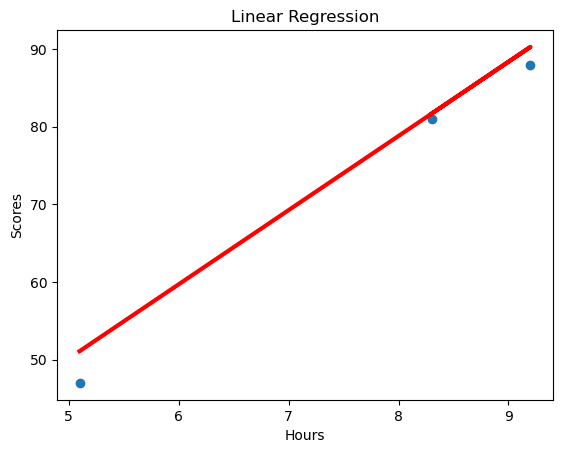

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
plt.show()

**insight:**
- terlihat bahwa seluruh data uji tidak berbeda jauh dari garis gradien sehingga secara garis besar model yang dibuat memiliki prediksi yang sangat akurat dan baik

Text(0, 0.5, 'Residual')

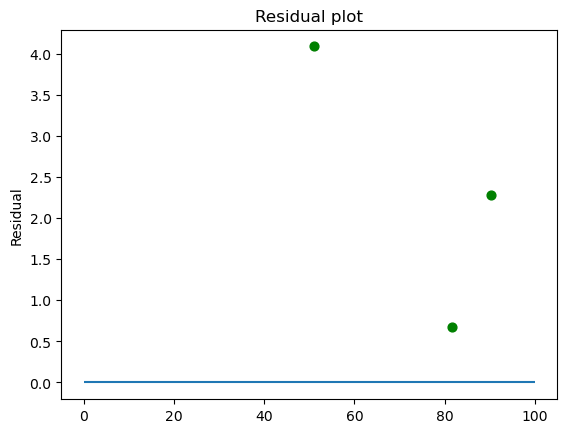

In [25]:
#Residual plot
plt.scatter(regressor.predict(x_test), regressor.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

**insight:**
- dari scatter plot diatas diketahui bahwa model regresi tidak terjebak dalam heteroskedastisitas karena garisnya tidak mengikuti besarnya nilai prediksi. artinya model layak untuk memprediksi data baru

###### Conclusion 

Tahapan SLR di python
1. Import Library
2. Membaca Data
3. Data pre-processing - EDA
4. Menentukan variable X dan variable Y
5. Splitting Data
6. Melakukan Pemodelan
7. Melakukan Prediksi Data
8. Uji Performa Model
9. Visualisasi hasil regresi'
10. Analisis residual